<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module1-linear-algebra-review/Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

## 1.1 Create a two-dimensional vector and plot it on a graph

In [0]:
import numpy as np
import matplotlib.pyplot as plt

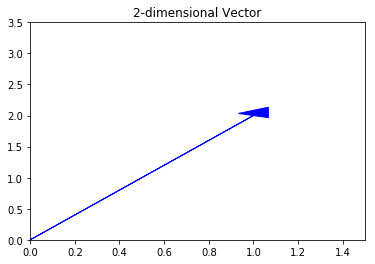

In [0]:
# Two-dimensional Vector
a = [1,2]

# Plot the Vector
plt.arrow(0,0, a[0], a[1], head_width=0.15, head_length=0.15, color='blue')
plt.xlim(0, 1.5)
plt.ylim(0, 3.5)
plt.title('2-dimensional Vector');

## 1.2 Create a three-dimensional vector and plot it on a graph

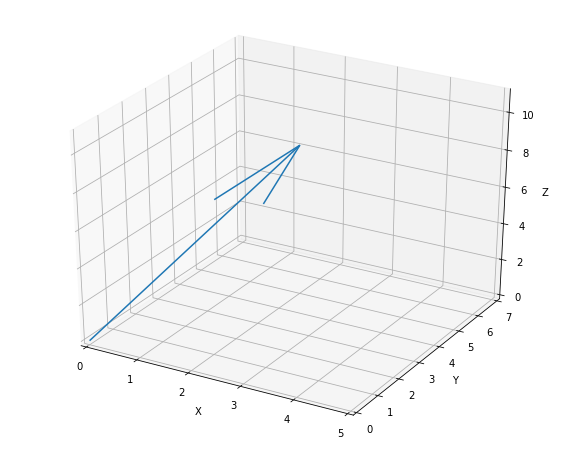

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create 3d vector
vector = np.array([[0, 0, 0, 2, 5, 8]])

X, Y, Z, U, V, W = zip(*vector)


# Plot the vector
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)

ax.set_xlim([0, 5])
ax.set_ylim([0, 7])
ax.set_zlim([0, 11])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

### Scale a vector from 1.1

In [0]:
from math import e, pi
print(e)
print(pi)

2.718281828459045
3.141592653589793


In [0]:
a_5 = np.multiply(5, a)
a_5

array([ 5, 10])

In [0]:
a_pi = np.multiply(pi, a)
a_pi

array([3.14159265, 6.28318531])

In [0]:
a_e = np.multiply(-e, a)
a_e

array([-2.71828183, -5.43656366])

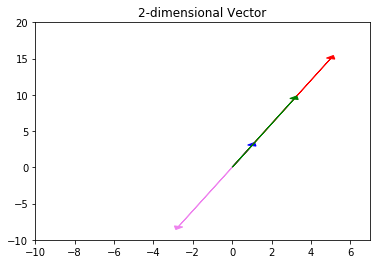

In [0]:
blue = [1, 3]

red = np.multiply(5, blue)
green = np.multiply(pi, blue)
violet = np.multiply (-e, blue)

plt.arrow(0,0, blue[0], blue[1], head_width=0.45, head_length=0.45, color='blue')
plt.arrow(0,0, red[0], red[1], head_width=0.45, head_length=0.45, color='red')
plt.arrow(0,0, green[0], green[1], head_width=0.45, head_length=0.45, color='green')
plt.arrow(0,0, violet[0], violet[1], head_width=0.45, head_length=0.45, color='violet')

plt.xlim(-10, 7)
plt.ylim(-10, 20)
plt.title('2-dimensional Vector');

In [0]:
# They are all on the same line so the points are colinear

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

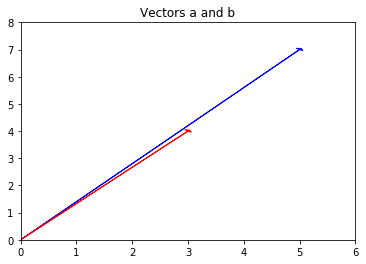

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

a = np.array([5, 7])
b = np.array([3, 4])


plt.arrow(0,0, a[0], a[1], head_width=.15, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], head_width=.15, head_length=0.05, color = 'red')
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.title("Vectors a and b")
plt.show()


## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

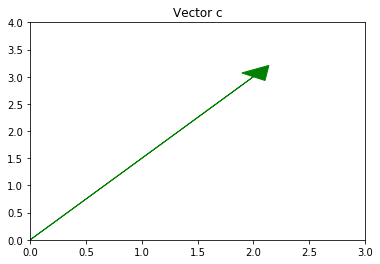

In [0]:
c = a-b

# Plot vector c
plt.arrow(0,0, c[0], c[1], head_width=.25, head_length=0.25, color='green')

plt.xlim(0,3)
plt.ylim(0,4)
plt.title("Vector c")
plt.show()

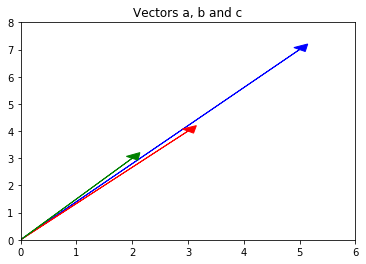

In [0]:
# Put Vector c on same graph as a and b
a = np.array([5, 7])
b = np.array([3, 4])
c = a-b

plt.arrow(0,0, a[0], a[1], head_width=.25, head_length=0.25, color ='blue')
plt.arrow(0,0, b[0], b[1], head_width=.25, head_length=0.25, color ='red')
plt.arrow(0,0, c[0], c[1], head_width=.25, head_length=0.25, color='green')

plt.xlim(0, 6)
plt.ylim(0, 8)
plt.title("Vectors a, b and c")
plt.show()

In [0]:
# looks like if you place c (green) at tip of vector b (red), it would extend to vector a (blue) which makes sense since c is the result of taking b from a (subtracting b from a)

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [0]:
# dot product
c = np.array([7, 22, 4, 16])
d = np.array([12, 6, 2, 9])
e = np.dot(c,d)
e

368

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [0]:
# Cross product - row vectors
q = ([5,7,2])
r = ([3,4,6])
s = np.cross(q,r)
s

array([ 34, -24,  -1])

In [0]:
# Cross product - column vectors
a = np.array([[5], [7], [2]])
b = np.array([[3], [4], [6]])
np.cross(a,b, axis=0)

array([[ 34],
       [-24],
       [ -1]])

## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [0]:
g = np.array([[1], [1], [1], [8]])
g

array([[1],
       [1],
       [1],
       [8]])

In [0]:
h = np.array([[3], [3], [3], [3]])
h

array([[3],
       [3],
       [3],
       [3]])

In [0]:
from numpy.linalg import norm
norm(g)

8.18535277187245

In [0]:
norm(h)

6.0

In [0]:
# g is longer than h

# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [0]:
A = np.array([[1,2], [3,4], [5,6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [0]:
A.ndim

2

In [0]:
B = np.array([2,4,6])
B

array([2, 4, 6])

In [0]:
B.ndim

1

In [0]:
C = np.array([[9,6,3], [4,7,11]])
C

array([[ 9,  6,  3],
       [ 4,  7, 11]])

In [0]:
C.ndim

2

In [0]:
D = np.array([[1,0,0], [0,1,0], [0,0,1]])
D

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [0]:
D.ndim

2

In [0]:
E = np.array([[1,3], [5,7]])
E

array([[1, 3],
       [5, 7]])

In [0]:
E.ndim

2

In [0]:
# A (3 x 2), C (2 x 3), D (3 x 3), and E (2 x 2) are 2 dimensional and B (1 x 3) is one dimensional

In [0]:
# Below is which ones can be multiplied together without doing a reshape
A_C = np.dot(A, C)
A_E = np.dot(A, E)
B_A = np.dot(B, A)
B_D = np.dot(B, D)
C_A = np.dot(C,A)
C_D = np.dot(C,D)
D_A = np.dot(D,A)
E_C = np.dot(E,C)
print('A can be multiplied with C', '\n', A_C)
print('A can be multiplied with E', '\n', A_E)
print('B can be multiplied with A', B_A)
print('B can be multiplied with D', B_D)
print('C can be multiplied with A', '\n', C_A)
print('C can be multiplied with D', '\n', C_D)
print('D can be multiplied with A', '\n', D_A)
print('E can be multiplied with C', '\n', E_C)



A can be multiplied with C 
 [[17 20 25]
 [43 46 53]
 [69 72 81]]
A can be multiplied with E 
 [[11 17]
 [23 37]
 [35 57]]
B can be multiplied with A [44 56]
B can be multiplied with D [2 4 6]
C can be multiplied with A 
 [[ 42  60]
 [ 80 102]]
C can be multiplied with D 
 [[ 9  6  3]
 [ 4  7 11]]
D can be multiplied with A 
 [[1 2]
 [3 4]
 [5 6]]
E can be multiplied with C 
 [[21 27 36]
 [73 79 92]]


## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [0]:
# The resulting matrices of C and D is 2 x 3. C has dimensions of 2 x 3 and D has dimensions of 3 X 3 and so it works becase m x n (n=3) for C is compatible with D's n x m (n = 3)
C_D = np.dot(C,D)
print('C can be multiplied with D', '\n', C_D)

C can be multiplied with D 
 [[ 9  6  3]
 [ 4  7 11]]


In [0]:
# Another way
print(np.matmul(C,D), '\n', 'The shape is: ', np.matmul(C,D).shape)

[[ 9  6  3]
 [ 4  7 11]] 
 The shape is:  (2, 3)


In [0]:
# The resulting matrice of A and E is 3 x 2. A has dimensions of 3 x 2 and E is 2 x 2 so they are compatible because A's m x n (n=2) is compatible with E's n x m (n=2)
A_E = np.dot(A, E)
print('A can be multiplied with E', '\n', A_E)

A can be multiplied with E 
 [[11 17]
 [23 37]
 [35 57]]


In [0]:
# Another way
print(np.matmul(A,E), '\n', 'The shape is: ', np.matmul(A,E).shape)

[[11 17]
 [23 37]
 [35 57]] 
 The shape is:  (3, 2)


In [0]:
# The resulting matrice of B and A is 1 x 2. B has dimensions of 1 x 3 and A has dimensions of 3 x 2 so it works because B's m x n (n=3) is compatible with A's n x m (n= 3)
B_A = np.dot(B, A)
print('B can be multiplied with A', B_A)

B can be multiplied with A [44 56]


In [0]:
# Another way
print(np.matmul(B,A), '\n', 'The shape is: ', np.matmul(B, A).shape)

[44 56] 
 The shape is:  (2,)


## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [0]:
F = np.array([[20, 19, 18, 17], [16, 15, 14, 13], [12, 11, 10, 9], [8, 7, 6, 5], [4, 3, 2, 1]])
F

array([[20, 19, 18, 17],
       [16, 15, 14, 13],
       [12, 11, 10,  9],
       [ 8,  7,  6,  5],
       [ 4,  3,  2,  1]])

In [0]:
F.T

array([[20, 16, 12,  8,  4],
       [19, 15, 11,  7,  3],
       [18, 14, 10,  6,  2],
       [17, 13,  9,  5,  1]])

In [0]:
# The numbers along the main diagonal from top L to bottom R in original are decreasing by multiples of 5 (20,15,10, 5)
# The numbers along the main diagonal from top L to bottom R in original are also descreasing by multiples of 5 (20, 15, 10, 5)..
# F is 5 x 4 dimensions
# F transpose is 4 x 5.

# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [0]:
# Identity
I = np.array([[1,0], [0,1]])
I

array([[1, 0],
       [0, 1]])

In [0]:
# G matrix
G = np.matrix('12, 11; 7, 10')
G

matrix([[12, 11],
        [ 7, 10]])

In [0]:
# So I * G = same matrix
I_G = np.matmul(I, G)
I_G

matrix([[12, 11],
        [ 7, 10]])

## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [0]:
H = np.array([[12, 11], [7, 10]])
H

array([[12, 11],
       [ 7, 10]])

In [0]:
det_H = np.linalg.det(H)
det_H

43.000000000000014

In [0]:
J = np.array([[0, 1, 2], [7, 10, 4], [3, 2, 0]])
J

array([[ 0,  1,  2],
       [ 7, 10,  4],
       [ 3,  2,  0]])

In [0]:
det_J = np.linalg.det(J)
det_J

-19.999999999999996

## 3.3 Find $H^{-1}$ and then find $J^{-1}$

In [0]:
H_n = np.linalg.inv(H)
H_n

array([[ 0.23255814, -0.25581395],
       [-0.1627907 ,  0.27906977]])

In [0]:
J_n = np.linalg.inv(J)
J_n

array([[ 0.4 , -0.2 ,  0.8 ],
       [-0.6 ,  0.3 , -0.7 ],
       [ 0.8 , -0.15,  0.35]])

## 3.4 Find $HH^{-1}$ and then find $J^{-1}J$. Is $HH^{-1} == J^{-1}J$? Why or Why not?

In [0]:
H_H_n = np.dot(H, H_n)
H_H_n

array([[1.00000000e+00, 5.55111512e-16],
       [2.22044605e-16, 1.00000000e+00]])

In [0]:
J_J_n = np.dot(J_n, J)
J_J_n

array([[ 1.00000000e+00,  2.22044605e-16,  0.00000000e+00],
       [-1.11022302e-16,  1.00000000e+00,  0.00000000e+00],
       [-1.66533454e-16, -1.11022302e-16,  1.00000000e+00]])

In [0]:
# They are not equal. Although they are identity matrices, they are Identities to two different matrices so not equal. H* H-1 = I and J-1 * J = I but H*H-1 is not equal to J-1 * J

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?



## Stretch Goal: Write a function that can calculate the dot product of any two vectors of equal length that are passed to it

In [0]:
def dot_product(vector_1, vector_2):
  if vector_1.shape[1] != vector_2.shape[0]:
    print("Error. The Vector shapes do not match. Vector 1 (n=columns) must equal Vector 2 (n=rows)")
  else:
    return np.dot(vector_1, vector_2)

In [0]:
dot_product(A, E)

array([[11, 17],
       [23, 37],
       [35, 57]])

In [0]:
dot_product(A, D)

Error. The Vector shapes do not match. Vector 1 (n=columns) must equal Vector 2 (n=rows)


## Stretch Goal: Write a function that can calculate the norm of any vector

In [0]:
# Stretch Goal: Write a function that can calculate the norm of any vector

def find_norm(v1):
  from numpy.linalg import norm
  return norm(v1)

find_norm(A)

9.539392014169456

In [0]:
find_norm(B)

7.483314773547883

## Stretch Goal: Create and plot a matrix on a 2d graph

In [0]:
mat = np.matrix('1 4 7; 2 5 8; 3 6 9; 4 7 10')
mat

matrix([[ 1,  4,  7],
        [ 2,  5,  8],
        [ 3,  6,  9],
        [ 4,  7, 10]])

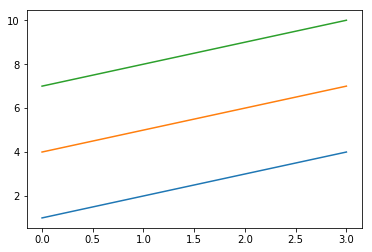

In [0]:
plt.plot(mat);

## Stretch Goal: Create and plot a matrix on a 3d graph.

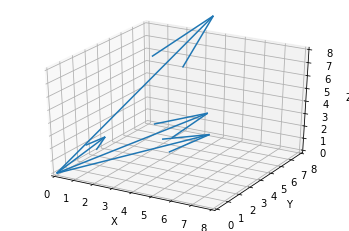

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

yellow = [1, 4, 7]
red = [2, 5, 8]
blue = [3, 6, 9]
green = [4, 7, 10]

vectors = np.array([[0, 0, 0, 2, 1, 3], 
                   [0, 0, 0, 5, 5, 2],
                   [0, 0, 0, 6, 3, 5],
                   [0, 0, 0, 4, 7, 10]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 8])
ax.set_ylim([0, 8])
ax.set_zlim([0, 8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Stretch Goal:
- Plot two vectors that are not collinear on a 2d graph. 
- Calculate the determinant of the 2x2 matrix that these vectors form. 
- How does this determinant relate to the graphical interpretation of the vectors?

In [0]:
v1 = np.array([[1], [5]])
v1

array([[1],
       [5]])

In [0]:
v2 = np.array([[3], [7]])
v2

array([[3],
       [7]])

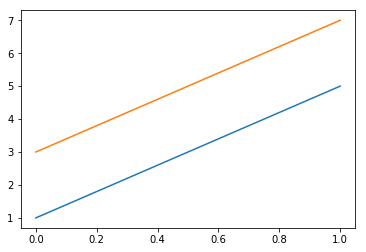

In [0]:
plt.plot(v1)
plt.plot(v2);

In [0]:
m1 = v1 + v2

In [0]:
m1

array([[ 4],
       [12]])

In [0]:
m1 = np.matrix('1, 4; 5, 12')
m1

matrix([[ 1,  4],
        [ 5, 12]])

In [0]:
m1_det = np.linalg.det(m1)
m1_det

-7.999999999999998

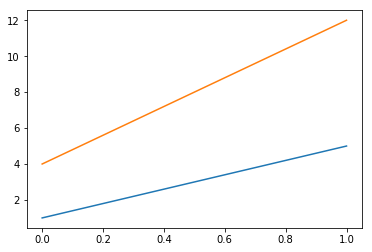

In [0]:
plt.plot(m1);